In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


In [20]:
food_data = pd.read_csv("./health.csv")
food_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [21]:
print(food_data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [22]:
missing_values_count = food_data.isnull().sum()
missing_values_count[0:10]
print(missing_values_count,"\n")

missing_values_count = food_data.isnull().sum()
total_cells = np.product(food_data.shape)
total_missing = missing_values_count.sum()
total_missing_percentage = (total_missing / total_cells) * 100
print("Percentage of missing values: %.2f%%" % total_missing_percentage)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 

Percentage of missing values: 0.33%


In [23]:
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
food_data['age_group'] = pd.cut(food_data['age'], bins=age_bins, labels=age_labels, right=False)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
food_data_encoded = pd.get_dummies(food_data, columns=categorical_columns, drop_first=True)

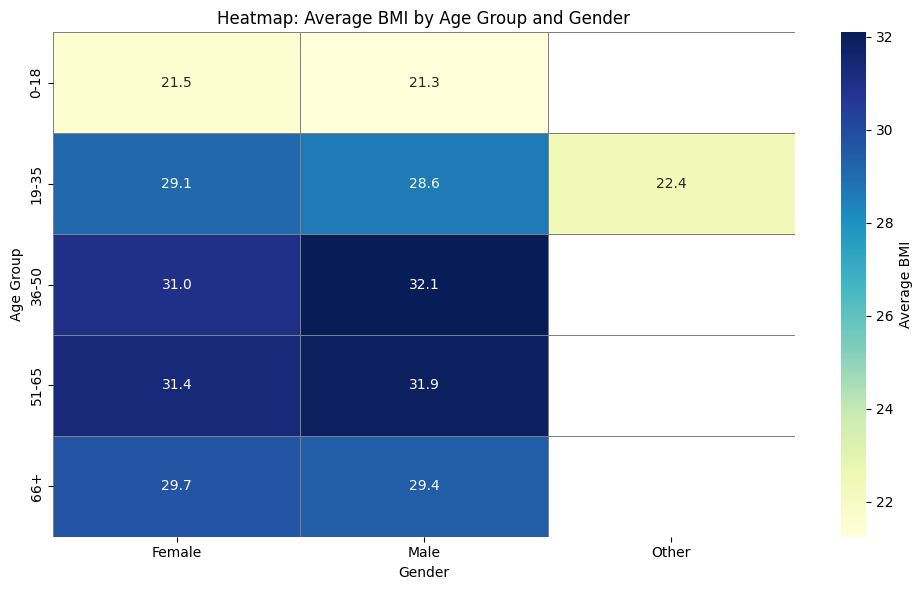

In [24]:
heatmap_data = food_data.pivot_table(index='age_group', columns='gender', values='bmi', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f",
            linewidths=0.5, linecolor='gray', cbar=True, cbar_kws={'label': 'Average BMI'})
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.title('Heatmap: Average BMI by Age Group and Gender')
plt.tight_layout()
plt.show()


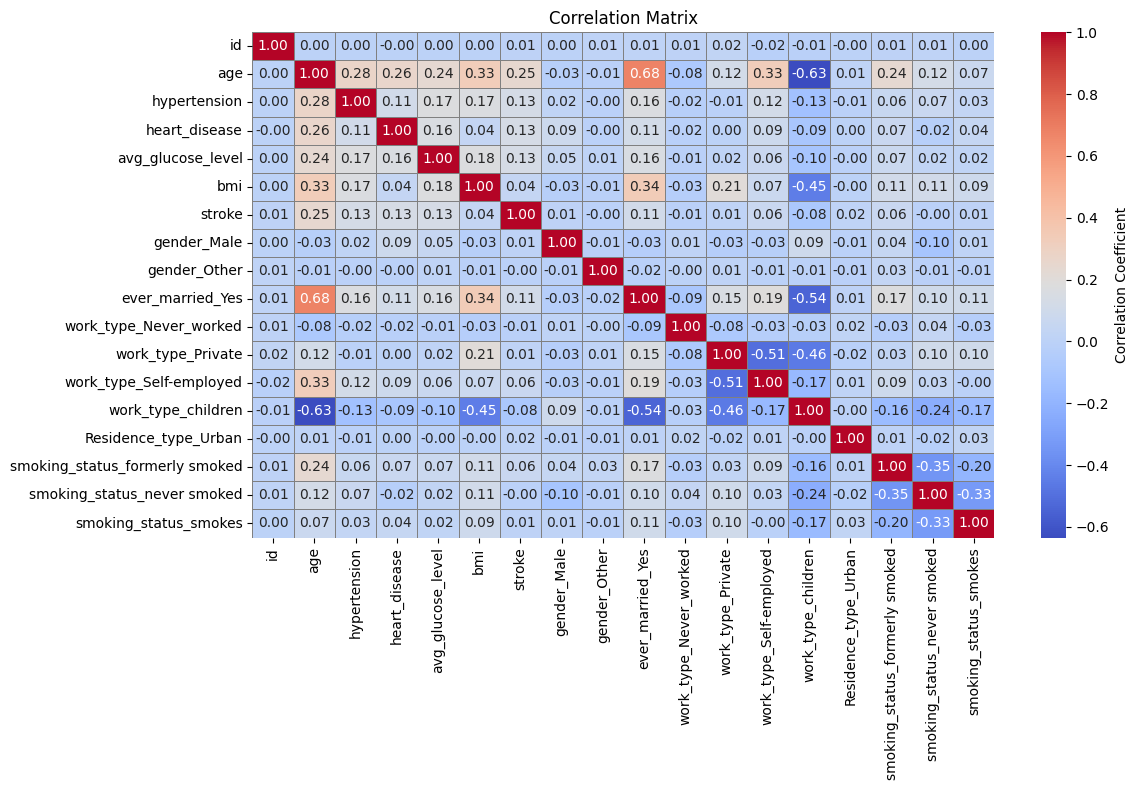

                                      id       age  hypertension  \
id                              1.000000  0.003538      0.003550   
age                             0.003538  1.000000      0.276398   
hypertension                    0.003550  0.276398      1.000000   
heart_disease                  -0.001296  0.263796      0.108306   
avg_glucose_level               0.001092  0.238171      0.174474   
bmi                             0.003084  0.333398      0.167811   
stroke                          0.006388  0.245257      0.127904   
gender_Male                     0.001776 -0.027623      0.021275   
gender_Other                    0.012984 -0.010659     -0.004597   
ever_married_Yes                0.013690  0.679125      0.164243   
work_type_Never_worked          0.005459 -0.078653     -0.021608   
work_type_Private               0.023698  0.116534     -0.005413   
work_type_Self-employed        -0.019956  0.327989      0.115442   
work_type_children             -0.013939 -0.6342

In [25]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
food_data_encoded = pd.get_dummies(food_data, columns=categorical_columns, drop_first=True) ################

correlation_matrix = food_data_encoded.drop(columns=['age_group']).corr() ##################

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, linecolor='gray', cbar=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print(correlation_matrix)

In [26]:
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
correlation_matrix = food_data[numerical_columns].corr()
print(correlation_matrix)

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.333398  0.245257  
hypertension       0.167811  0.127904  
heart_disease      0.041357  0.134914  
avg_glucose_level  0.175502  0.131945  
bmi                1.000000  0.042374  
stroke             0.042374  1.000000  


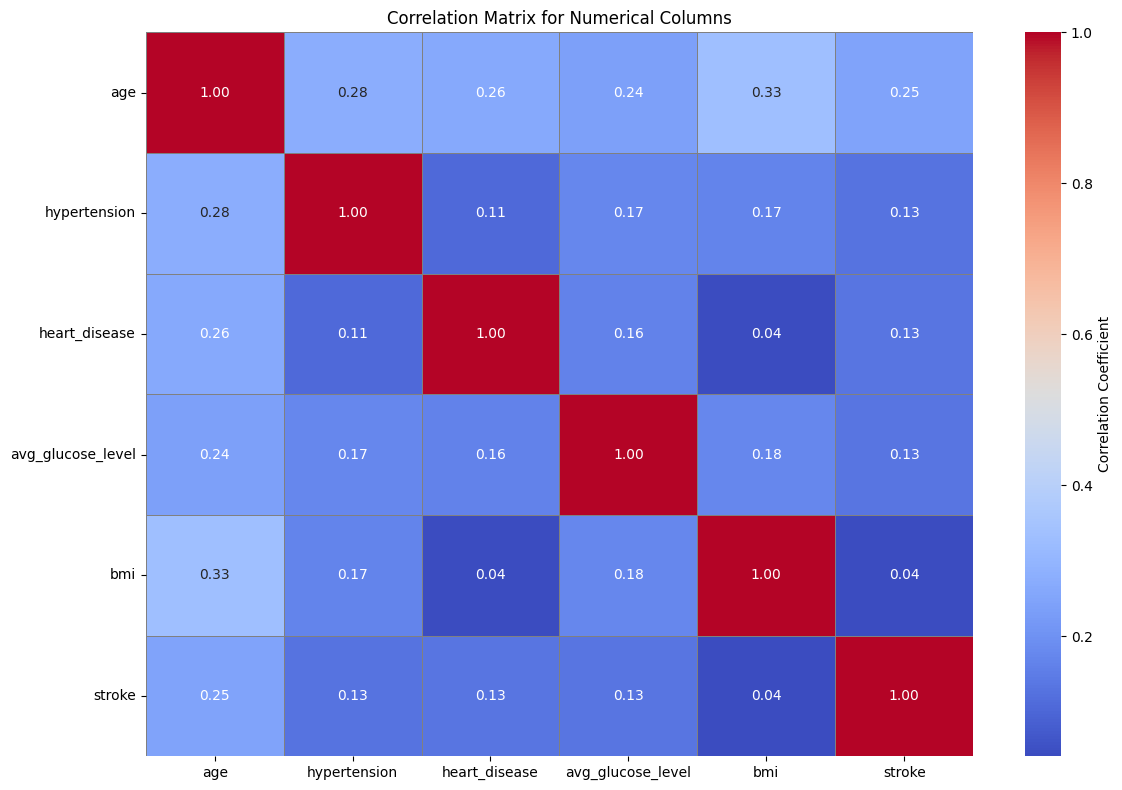

In [27]:
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

correlation_matrix = food_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, linecolor='gray', cbar=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Numerical Columns')
plt.tight_layout()
plt.show()

In [28]:
age_group_encoded = pd.get_dummies(food_data['age_group'], prefix='age', drop_first=True) #####################3
food_data_encoded = pd.concat([food_data_encoded, age_group_encoded], axis=1) ##################
food_data_encoded.drop(columns=['age_group'], inplace=True) #################
X = food_data_encoded.drop(columns=['stroke']) ############
y = food_data_encoded['stroke'] ############## 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_imputed, y_train)


y_pred_gb = gb_classifier.predict(X_test_imputed)
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb, zero_division=1))
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion matrix:\n", conf_matrix_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      1.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.98      1022
weighted avg       0.88      0.94      0.97      1022

Confusion matrix:
 [[958   2]
 [ 62   0]]
Gradient Boosting Classifier Accuracy: 0.9373776908023483


In [30]:
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

y_pred_rf = rf_classifier.predict(X_test_imputed)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf, zero_division=1))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:\n", conf_matrix_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022

Confusion matrix:
 [[960   0]
 [ 62   0]]
Random Forest Classifier Accuracy: 0.9393346379647749


In [31]:
food_data['bmi'] = pd.to_numeric(food_data['bmi'], errors='coerce')
food_data.dropna(subset=['bmi'], inplace=True)

X = food_data.drop(columns=['stroke'])
y = food_data['stroke']

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True) ##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X_train_numeric = X_train[numerical_columns]
X_test_numeric = X_test[numerical_columns]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

logreg.fit(X_train_imputed, y_train)

y_pred = logreg.predict(X_test_imputed)

print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred))
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Logistic Regression Classifier Accuracy:", accuracy_logreg)

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       929
           1       0.16      0.87      0.28        53

    accuracy                           0.75       982
   macro avg       0.58      0.81      0.56       982
weighted avg       0.95      0.75      0.82       982

Confusion matrix:
 [[695 234]
 [  7  46]]
Logistic Regression Classifier Accuracy: 0.754582484725051


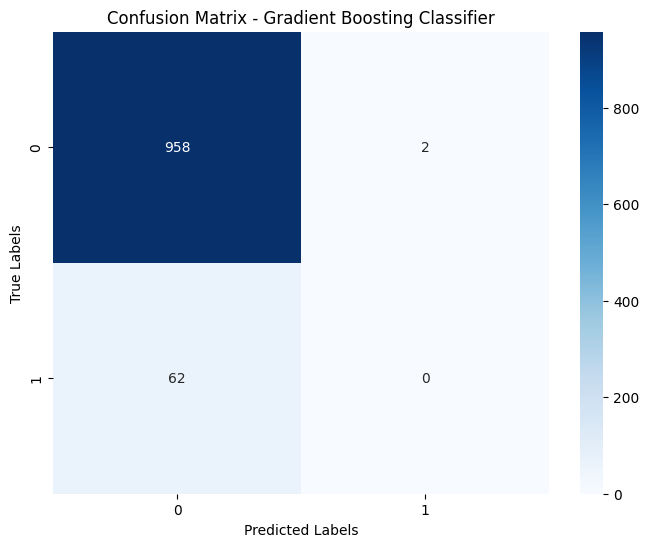

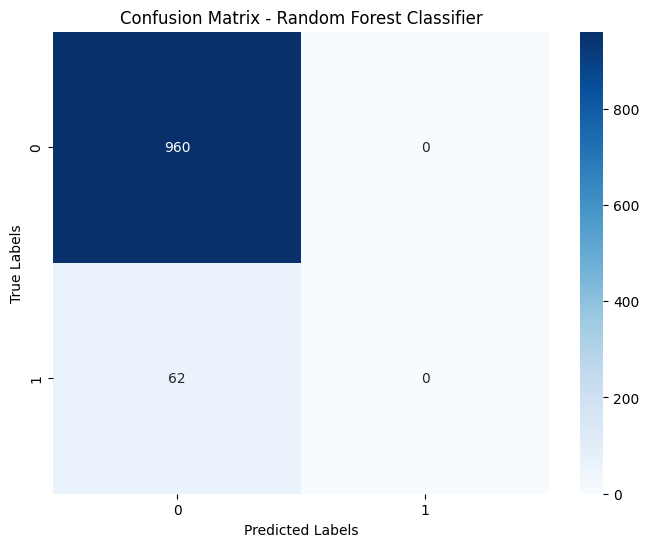

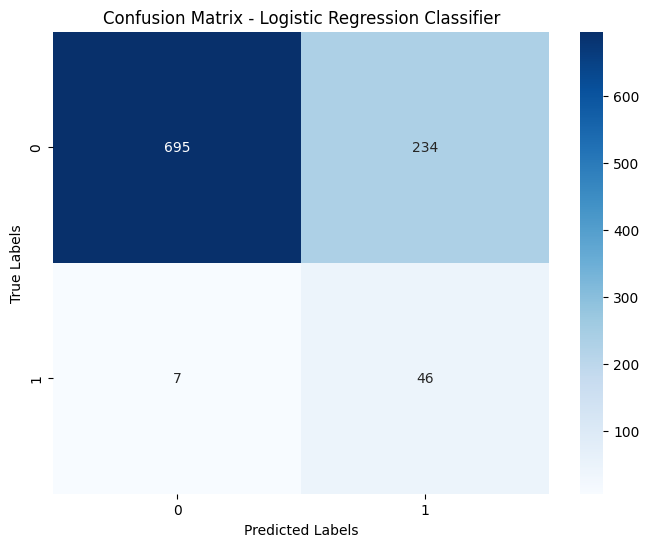

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

food_data = pd.read_csv("./health.csv")

food_data['bmi'] = pd.to_numeric(food_data['bmi'], errors='coerce')
food_data.dropna(subset=['bmi'], inplace=True)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
food_data_encoded = pd.get_dummies(food_data, columns=categorical_columns, drop_first=True)

X = food_data_encoded.drop(columns=['stroke']) ##############
y = food_data_encoded['stroke'] #####################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)


Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982

Confusion matrix:
 [[688 241]
 [  8  45]]


In [34]:
best_accuracy = max(accuracy_gb, accuracy_rf, accuracy_logreg)
best_method = None
if best_accuracy == accuracy_gb:
    best_method = "Gradient Boosting Classifier"
elif best_accuracy == accuracy_rf:
    best_method = "Random Forest Classifier"
elif best_accuracy == accuracy_logreg:
    best_method = "Logistic Regression Classifier"

print(f"The best method based on accuracy is: {best_method} with accuracy {best_accuracy:.2f}")

The best method based on accuracy is: Random Forest Classifier with accuracy 0.94


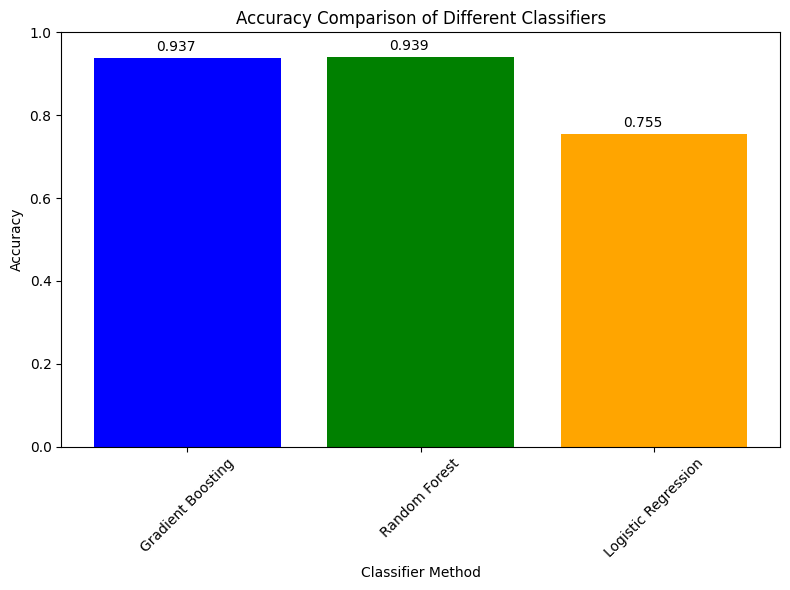

In [35]:
import matplotlib.pyplot as plt
accuracies = [accuracy_gb, accuracy_rf, accuracy_logreg]
methods = ["Gradient Boosting", "Random Forest", "Logistic Regression"]
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, accuracies, color=['blue', 'green', 'orange'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() 
             + 0.01, f'{accuracy:.3f}', 
             ha='center', va='bottom', color='black', fontsize=10)
plt.ylim(0.0, 1.0) 
plt.xlabel("Classifier Method")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Classifiers")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()
